Загрузим датасет

In [1]:
# Начните писать тут
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
df_train = pd.read_csv("train.csv")
df_test= pd.read_csv("test.csv")

Общие методы для всей программы

In [2]:
#нормализация одной колонки
def normal(s):
    s2 = s.apply(np.log1p) #логарифмируем
    mins = s2.min()
    maxs = s2.max()
    return s2.apply(lambda x: (x-mins)/(maxs-mins))

#ошибка
def  cost(w, X, y):

    N = len(y)

    predictions = X.dot(w)

    cost = (1/N) * np.sum(np.square(predictions-y))

    return cost

#нормализация двух колонок и перевод в матрицы
def normalize(X,Y):
    x = [[1]]*Y.shape[0]
    y = normal(Y).to_numpy()
    for s in X:
        x = np.hstack((x,normal(X[s]).to_numpy().reshape(-1,1)))

    return x,y

Создадим L2 регулиризацию (прибавим к производной функции просто призведение суммы всех весов на коэффициент) взяв регрессию из прошлой домашки

In [3]:
#градиент L2 с производной
def gradientL2_der(x,y,w,lamb):
    e = 0.001
    N = len(y)
    history =  np.zeros(10000)
    for i in range(1,10000):
        pr = np.dot(x,w)
        der =  (2/N)*(x.T.dot(pr - y))+2*lamb*np.sum(w)
        history[i] = cost(w,x,y)
        w = w - e*der
    return w, history

# регрессия L2
def regressionL2_der(X,Y,lamb):
    w = [np.random.random()]
    x = [[1]]*Y.shape[0]
    y = normal(Y).to_numpy()
    for s in X:
        w.append(np.random.random())
        x = np.hstack((x,normal(X[s]).to_numpy().reshape(-1,1)))
        
    w, history = gradientL2_der(x, y, w,lamb)
    return w, history 



Создадим ту же L2 нормализацию, но не берём производную от самой L2 функции

In [4]:
#градиент L2 с производной
def gradientL2(x,y,w,lamb):
    e = 0.001
    N = len(y)
    history =  np.zeros(10000)
    for i in range(1,10000):
        pr = np.dot(x,w)
        der =  (2/N)*(x.T.dot(pr - y))+lamb*np.square(w).sum()
        
        history[i] = cost(w,x,y)
        w = w - e*der
    return w, history

# регрессия L2
def regressionL2(X,Y,lamb):
    w = [np.random.random()]
    x = [[1]]*Y.shape[0]
    y = normal(Y).to_numpy()
    for s in X:
        w.append(np.random.random())
        x = np.hstack((x,normal(X[s]).to_numpy().reshape(-1,1)))
        
    w, history = gradientL2(x, y, w,lamb)
    return w, history 

Создадим переменные ввода датасета

In [5]:
train_x = df_train[['GrLivArea', 'YearBuilt']].iloc[701:]
train_y = df_train['SalePrice'].iloc[701:]
test_x = df_train[['GrLivArea', 'YearBuilt']].iloc[:700]
test_y =df_train['SalePrice'].iloc[:700]

In [12]:
lamb = 0.1 #коэффициент регулиризации
wL2, historyL2 = regressionL2(train_x, train_y, lamb)
wL2_der, historyL2_der = regressionL2_der(train_x, train_y, lamb)
wL2, wL2_der

(array([0.27199555, 0.35870979, 0.08293805]),
 array([0.3918614 , 0.05074972, 0.05057795]))

Проверим мой результат с библиоткечной L2 регулиризацией. 
Синий - без производной. 
Оранжевый - с производной.
Зеленый - sklearn.

0.008956913453924392
0.018226837340995925
0.005129712038810076
[0.         0.60385067 0.26766003]


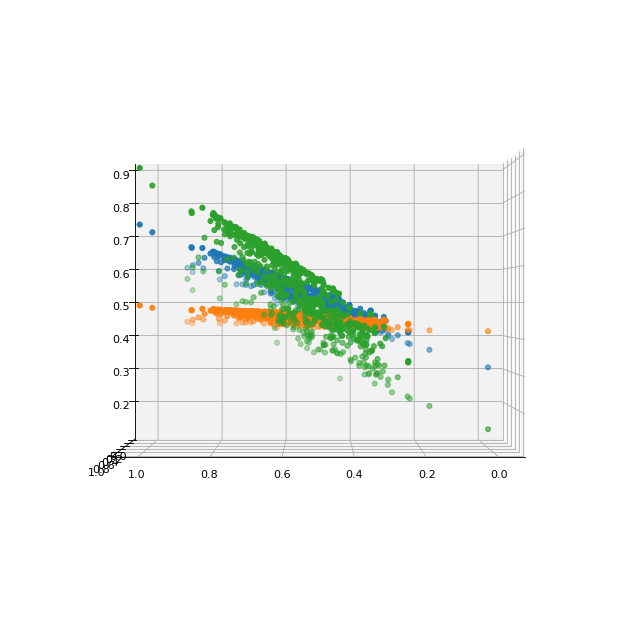

In [15]:
#нормализуем тестовые значения
X_test, Y_test = normalize(test_x, test_y)
Y_L2 = np.dot(X_test, wL2)
Y_L2_der = np.dot(X_test, wL2_der)


#чужая реализация L2
from sklearn import linear_model, datasets, metrics, model_selection
ridge_reg = linear_model.Ridge(alpha=lamb)
X_train, Y_train = normalize(train_x, train_y)
ridge_reg.fit(X_train, Y_train)
Y_ridge = np.dot(X_test, ridge_reg.coef_)

fig = plt.figure(figsize=(10, 10), dpi=80)
ax = fig.add_subplot(projection='3d')

print(cost(wL2,X_test,Y_test))#ошибка без производной
print(cost(wL2_der,X_test,Y_test))#ошибка спроизводной
print(cost(ridge_reg.coef_,X_test,Y_test))#ошибка sklearn
print(ridge_reg.coef_)#коэффициенты sklearn


ax.scatter(X_test[:, 1], X_test[:, 2], Y_L2)

ax.scatter(X_test[:, 1], X_test[:, 2], Y_L2_der)

ax.scatter(X_test[:, 1], X_test[:, 2], Y_ridge)
ax.view_init(0, 90)